# Project 1
By Alexander Hatle

In this project we are interested in the case of underdetermined linear systems on the form
$$A\vec x=\vec y$$
 We will use methods such as Gram Schmidt and Tikhonov regulation to find an $x_{min}$ such that the error $||x_{true}-x_{min}||^2$ is minimized.

First thing first. We need to import all the necessary modules, and define the handed out function `generate_A()`.

In [2]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
np.random.seed(40)

In [111]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

## Task 1
### a)

<img src="pictures/Screenshot 2022-09-19 at 11.07.35.png">

$$A = \begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 1\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}0  \\  1\end{pmatrix}$$

<img src="pictures/Screenshot 2022-09-19 at 11.12.01.png">

$$A = \begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 0\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}1  \\  1\end{pmatrix}$$

### b)

<img src="pictures/Screenshot 2022-09-19 at 11.14.49.png">

We know that a matrix A is symmetric if $A^T=A$ 
$$(A^{T}A)^{T}=A^{T}(A^{T})^{T} = A^{T}A \Rightarrow \text{Symmetric}$$
$$(AA^{T})^{T}=(A^{T})^{T} A^{T}= AA^{T} \Rightarrow \text{Symmetric}$$
A matrix is positive semi-definite if it satisfies
$$\vec x^{T}A\vec x \ge 0, \qquad \text{for all } x\in \mathbb{R}^{n}$$
$$\vec x^{T}A^{T}A\vec x = (A\vec x)^{T }A\vec x= ||A\vec x||^{2} \ge 0$$
$$\vec x^{T}AA^{T}\vec x=(A^{T}\vec x)^{T}A^{T}\vec x=||A^{T}\vec x||^{2} \ge 0$$
So both $A^{T}A$ and $AA^{T}$ are symmetric positive semi-definite.

Let's investigate the invertibility of these two matrices, given that A is full-rank, $rank(A)=m$.
$$AA^{T}\in\mathbb{R}^{m\times m}, \quad A^{T}A \in\mathbb{R}^{n\times n}$$
We also know that 
$$rank(A)=rank(A^{T}A)=rank(AA^{T})=m$$
Since $AA^{T}\in\mathbb{R}^{m\times m}$ and $rank(AA^{T})=m$, then $AA^{T}$ is full-rank and therefore invertible.

Since $A^{T}A\in\mathbb{R}^{n\times n}$ and $rank(A^{T}A)= m$, then $A^{T}A$ is not full-rank and therefore not invertible.

### c)

<img src="pictures/Screenshot 2022-09-19 at 11.35.33.png">

$$\begin{align*}
\mathcal{L}(\vec x, \vec \lambda) &= \vec x^{T}\vec x+\vec \lambda^T(A\vec x -\vec y)\\
&=\sum\limits_{i=1}^{n}\left(\vec x_{i}^{2} + \lambda_{i}\left(\sum\limits_{j=1}^{m}a_{ij}x_{j}-y_{i}\right)\right)\\
\frac{\partial \mathcal{L}}{\partial x_{k}}&=2x_{k}+\frac{\partial}{\partial x_{k}}\sum\limits_{i=1}^{n}\lambda_{i}\sum\limits_{j=1}^{m}a_{ij}x_i\\
&=2x_{k}+\sum\limits_{i=1}^{n}\lambda_{k}a_{ik}\\
\nabla_{x}\mathcal{L}&=2\vec x +A^{T}\vec \lambda=0&\qquad\text{(1)}\\
\frac{\partial\mathcal{L}}{\partial \lambda_{k}}&=\sum\limits_{j=1}^{m}a_{kj}x_{j}-y_{k}\\
\nabla_{\lambda}\mathcal{L}&=A\vec x-\vec y=0 &\qquad\text{(2)}\\
\vec x&=- \frac{1}{2}A^{T}\vec \lambda\qquad&\text{rewriting (1)}\\
 A\left(- \frac{1}{2}A^{T}\vec \lambda\right)&=- \frac{1}{2}AA^{T}\vec \lambda=\vec y&\text{(1) in (2)}\quad\\
\vec \lambda&=-2(AA^{T})^{-1}\vec y\\
2\vec x +A^{T}\vec\lambda&=2\vec x-2A^{T}(AA^{T})^{-1}\vec y=0 &\text{in (2)}\\
\vec x &=A^{T}(AA^{T})^{-1}\vec y \qquad\square
\end{align*}$$

### d)

<img src="pictures/Screenshot 2022-09-19 at 12.43.09.png">

<img src="pictures/Screenshot 2022-09-19 at 12.42.42.png">

We know that  $\vec x_{min}= A^{T}(AA^{T})^{-1}\vec y$  and $Q^{T}Q=I$ since $Q$ is orthogonal.
$$AA^{T}=AQR=(Q^{T}A^{T})^{T}R=(Q^{T}QR)^{T}R=R^TR$$
$$\vec x_{min}=QR(R^{T}R)^{-1}\vec y=QRR^{-1}R^{-T}\vec y$$
$$\vec x_{min}=QR^{-T}\vec y$$


Let's implement Gram Schmidt as shown in lectures. Our implementation will use this scheme, where $\vec q_{i}$ refers to the i-th column vector of $Q$, $\vec a_{i}$ referes to the i-th column vector of $A$ and $\vec u$ is a temporary vector.
$$\vec u_{k}= \vec a_{k}-\sum\limits_{j=1}^{k-1}(\vec a_{k},\vec q_{j})\vec q_{j}$$
$$\vec q_{k}= \frac{\vec u_k}{||\vec u_{k}||_{2}}$$
And then we will compute $R$:
$$R = \begin{pmatrix}(\vec a_{1},\vec q_{1}) & (\vec a_{2},\vec q_{1}) & \dots & (\vec a_n,\vec q_{1}) \\ 0 & (\vec a_{2},\vec q_{2}) & \dots & (\vec a_n,\vec q_{2}) \\ \vdots & 0 & \ddots & \vdots \\ 0 & \dots & 0 & (\vec a_{n},\vec q_{n})\end{pmatrix}$$


In [112]:
def gramSchmidt(A):
    n, m = A.shape
    # Make empty matrices
    Q = np.zeros((n,m))
    R = np.zeros((m,m))
    for k in range(m):
        sum = 0
        for j in range(k):
            sum += np.dot(A[:,k], Q[:,j]) * Q[:,j]
        u = A[:,k] - sum
        Q[:,k] = u / np.linalg.norm(u)
    # Compute R
    for i in range(n):
        for j in range(i, m):
            R[i, j] = np.dot(A[:,j], Q[:,i])
    return Q, R

Okay, let's test to see if this actually works. I will compare my $Q$, $R$ and $QR$ to a numpy function.

In [16]:
A = np.array([[1,5,3,2],
            [9,1,5,2]], dtype=float)
Q, R = gramSchmidt(A.transpose())
print("Q\n", Q)
print("R\n", R)
print("QR\n", Q@R)

print("--------Numpy.linalg.qr---------")
result = np.linalg.qr(A.transpose())
print("Q\n", result[0])
print("R\n", result[1])
print("QR\n", result[0]@result[1])

Q
 [[ 0.16012815  0.89458644]
 [ 0.80064077 -0.35445878]
 [ 0.48038446  0.27006383]
 [ 0.32025631  0.03375798]]
R
 [[6.244998   5.28422908]
 [0.         9.1146543 ]]
QR
 [[1. 9.]
 [5. 1.]
 [3. 5.]
 [2. 2.]]
--------Numpy.linalg.qr---------
Q
 [[-0.16012815  0.89458644]
 [-0.80064077 -0.35445878]
 [-0.48038446  0.27006383]
 [-0.32025631  0.03375798]]
R
 [[-6.244998   -5.28422908]
 [ 0.          9.1146543 ]]
QR
 [[1. 9.]
 [5. 1.]
 [3. 5.]
 [2. 2.]]


We can notice some differences, that the first column of  and the first row of R has all signs flipped. This difference fades away when these multiply with eachother however, we get identical $QR$. This makes sense, since the QR-decomposition is unique only if we require the diagonal entries of R to be positive.

### e)

<img src="pictures/Screenshot 2022-09-19 at 14.09.50.png">

$$\begin{align*}
\vec x_{min}&= QR^{-T}\vec y\\
\text{We define}\\
\vec u&=R^{-T}\vec y \\
 \vec y &=R^{T}\vec u\\
\vec x_{min}&= Q\vec u 
\end{align*}$$
So we will use `scipy.linalg.solve_triangular` to find $\vec u$, where we set `lower = True` since $R^T$ is a lower triangular matrix. From there we only need to calculate the matrix-vector multiplication $Q\vec u$ to find $x_{min}$.


In [141]:
def findXmin(Q, R, y):
    u = linalg.solve_triangular(np.copy(R.transpose()), y, lower = True)
    return Q@u

Okay, now that we have implemented both Gram-Schmidt and this method, we can finally test it on a system. Let's take my example in 1a) where the linear system does not have a solution:

$$A = \begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 1\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}0  \\  1\end{pmatrix}$$

In [142]:
A = np.array([[1,1,1], 
               [1,1,1]], dtype = float)
y = np.array([0, 1], dtype = float)
Q, R = gramSchmidt(A.transpose())
x_min = findXmin(Q, R, y)

print("x_min:  ", x_min.round(3))
print("Ax_min: ", A@x_min)

x_min:   [0.333 0.333 0.333]
Ax_min:  [1. 1.]


Now we see that we get $y_{approx}= \begin{pmatrix}1 \\ 1\end{pmatrix}$, which is a minimum of difference from $\vec y$.

We can also look at the case with infinitely many solutions:
$$A = \begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 0\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}1  \\  1\end{pmatrix}$$

In [41]:
A = np.array([[1,1,1], 
               [1,1,0]], dtype = float)
y = np.array([1, 1], dtype = float)
Q, R = gramSchmidt(A.transpose())
x_min = findXmin(Q, R, y)

print("x_min:  ", x_min.round(3))
print("Ax_min: ", A@x_min)

x_min:   [ 0.5  0.5 -0. ]
Ax_min:  [1. 1.]


Now we see that we get $y_{approx}= \begin{pmatrix}1 \\ 1\end{pmatrix}$, as expected when we have a solution.

### f)
#### Compare these methods:

<img src="pictures/Screenshot 2022-09-19 at 14.16.25.png">

For ease of use, I will define a function to generate linear systems.

In [114]:
# Handed out code
def generate_Problem(m, n, N = 100):
    '''
    Generate N linear systems of Ax = y, where A is the same
    Parameters:
        m: int, height of matrix
        n: int, width of matrix
        N: int, number of x, y vectors
    
    Output:
        X: array(nxN), N x vectors
        Y: array(mxN), N y vectors
        A: array(mxn), matrix in linear system
        N: int, number of x, y vectors
    '''
    A = generate_A(m,n)

    # Generate solutions X columnwise, X[:,i] to access i-th vector
    X = np.random.normal(0.0,1.0,(A.shape[1],N))

    # Generate left hand sides Y columnwise Y[:,i] to access lhs
    Y = np.dot(A,X)
    return X.copy(), Y.copy(), A.copy(), N
    
X, Y, A, N = generate_Problem(3,2)
# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(2, 100)
(3, 100)


We want to find N $x_{mins}$ for these N systems, and compare these to the $x_{true}$ that we used to generate these systems.

Now we can compare times between our QR decomposition method, and a numpy method (which I will define soon).
We start with our QR decomposition method.

In [187]:
%%timeit -r 5
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
Q, R = gramSchmidt(A.transpose())
X_mins = np.zeros(X.shape)
for i in range(N):
    X_mins[:,i] = findXmin(Q.copy(), R.copy(), Y[:,i])

5min 3s ± 18.3 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


This took a long time. We should also look at $||\vec x_{min}- \vec x_{true}||_2$ for one of the cases. We have to do this in a new cell, since %%timeit doesn't save any variables.

One loop:

In [11]:
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
Q, R = gramSchmidt(A.transpose())
X0_min = findXmin(Q.copy(), R.copy(), Y[:,0])
print(np.linalg.norm(X[:,0] - X0_min))

76.1062318583492


Let's compare this with another method, which consists of first calculating $\vec z$ from $AA^{T}\vec z = \vec y$ 

and then calculate $\vec x_{min}=A^{T}\vec z$.

In [145]:
def numpyMethod(AAt, y):
    z = np.linalg.solve(AAt, y)
    x_min = A.transpose()@z
    return x_min

Timing this method as before:

In [201]:
%%timeit -r 5
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
X_mins = np.zeros(X.shape)
AAt = A@A.transpose()

for i in range(N):
    X_mins[:,i] = numpyMethod(AAt, Y[:,i])

27.1 s ± 1.54 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


This is much faster, about 10 times as fast! Seems that these numpy developers are pretty clever.

Let's also look at the norm again:

In [146]:
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
AAt = A@A.transpose()
X0_min = numpyMethod(AAt, Y[:,0])
print(np.linalg.norm(X[:,0] - X0_min))

76.1062318583492


Note that we get the exact same error (machine precision), which I take as a reassurance that the QR decomposition works.

## Task 2
### a)

<img src = "pictures/Screenshot 2022-09-19 at 14.11.38.png">

We have
$$T(\vec x) = ||A\vec x-\vec y||^{2} + \mu||\vec x||^{2}$$
Let's call $\vec v=A\vec x-\vec y$ and introduce the frobernius inner product ( : ).

$d\vec v=Ad\vec x$ 
$$\begin{align*}
T(\vec x) &= ||\vec v||^{2}+\mu||x||^{2}\\
&=(\vec v:\vec v) + \mu\cdot(\vec x:\vec x)\\
\nabla_xT(\vec x)&=(2\vec v:d\vec v) +\mu(2\vec x:d\vec x)\\
&=(2(A\vec x-\vec y):Ad\vec x)+\mu(2\vec x:d\vec x)\\
&=2A^{T}(A\vec x-\vec y)+2\mu\vec x
\end{align*}$$
For a solution $\vec x_{r}$:
$$\nabla_{x} T=2A^{T}A\vec x_{r}-2A^{T}\vec y+2\mu\vec x_{r}=0$$
$$(A^{T}A+\mu I)\vec x_{r}=A^{T}\vec y \qquad\square$$
We saw in 1b) that $A^TA$ is SPD and invertible.
 
$\mu I$ is diagonal and therefore symmetric and invertible since $\mu ≠ 0$.
$$\vec x^{T}\mu I\vec x =\mu ||\vec x||^{2} \ge 0 \qquad \forall\quad \vec x\in\mathbb{R^n}$$
Since $\mu>0$. 

So $A^TA +\mu I$ is SPD and invertible

### b)

<img src = "pictures/Screenshot 2022-09-19 at 14.12.21.png">

We have: $A=U\Sigma V^{T}$ and therefore $A^{T}=V\Sigma^{T}U^{T}$
Where $U\in\mathbb{R}^{mxm},V\in\mathbb{R}^{nxn}$ are unitary matrices $(U^{-1}=U^{T}, V^{-1}=V^{T})$  and $\Sigma\in\mathbb{R}^{mxn}$ is a rectangular matrix containing only values on the diagonal.

From last problem:
$$(A^{T}A+\mu I_{n})\vec x_{r}=A^{T}\vec y$$
$$(V\Sigma^{T}U^{T}U\Sigma V^{T}+\mu I_{n})\vec x_{r}=V\Sigma^T U^{T}$$
$$(V\Sigma^{T}\Sigma V^{T}+\mu I_{n})\vec x_{r}=V\Sigma^T U^{T}$$
$$\mu I_{n}=\mu VV^{T}=V \mu V^{T}=V \mu I_{n} V^{T}$$
since multiplying a scalar with a matrix is commutative. Putting this back in the original expression:
$$V(\Sigma^{T}\Sigma+\mu I_{n})V^{T}\vec x_{r}= V\Sigma^T U^{T} \vec y$$
$$\begin{align*}
\vec x_{r}&=(V(\Sigma^{T}\Sigma+\mu I_{n}) V^{T})^{-1}V\Sigma^T U^{T}\vec y\\
&=(V^{T})^{-1}(\Sigma^{T}\Sigma+\mu I_{n})^{-1}V^{-1}V\Sigma^T U^{T}\vec y\\
&=V(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^T U^{T}\vec y\\
\vec x_{r}&=VDU^{T}\vec y 
\end{align*}$$
Where
$$D=(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^T$$ 

 Let's compute this, using $\Sigma=diag(\sigma_{1},\dots,\sigma_{m})\in\mathbb{R}^{mxn}$ :
$$\begin{align*}
\Sigma^{T}\Sigma&=diag(\sigma_{1}^2,\dots \sigma_{m}^2,0,\dots 0)\in\mathbb{R}^{nxn}\\
\mu I_{n}&=diag(\mu,\dots,\mu)\in\mathbb{R}^{nxn}\\
\Sigma^{T}\Sigma+\mu I_{n}&=diag(\mu+ \sigma_{1}^2,\dots,\mu+\sigma_{m}^2,\mu,\dots,\mu)\in\mathbb{R}^{nxn}\\
(\Sigma^{T}\Sigma+\mu I_{n})^{-1}&=diag\left( \frac{1}{\mu+\sigma_{1}^2},\dots, \frac{1}{\mu+\sigma_{m}^2}, \frac{1}{\mu},\dots, \frac{1}{\mu}\right)\in\mathbb{R}^{nxn}\\
(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^{T}&=diag\left( \frac{\sigma_{1}}{\mu+\sigma_{1}^2} , \dots, \frac{\sigma_{m}}{\mu+\sigma_{m}^2}\right)\in\mathbb{R}^{nxm}
\end{align*}$$


Now we can simply use this formula and avoid inverting matrices and matrix multiplication. This fits well with the fact that we are given $\Sigma$ as a vector.

### c)

<img src = "pictures/Screenshot 2022-09-19 at 14.12.43.png">

In this function I've decided to first calculate $D$, then $DU^T$, and finally $VDU^T \vec y$.

Since ´S´ is given as a vector, I found it logical to also store $D$ as an vector. That leads to that I need to do some tricks to calculate $DU^T$ which I will explain.

In actuality, $D$ is an $n\times m$ matrix, which has this form:
$$\begin{pmatrix}\frac{\sigma_{1}}{\sigma_{1}^{2}+\mu} & 0 & \dots & 0 \\ 0 & \frac{\sigma_{2}}{\sigma_{2}^{2}+\mu} & \ddots & \vdots \\ \vdots & 0 & \ddots & 0 \\ \vdots & \cdots & \ddots & \frac{\sigma_{m}}{\sigma_{m}^{2}+\mu} \\ 0 & 0 & 0 & 0\end{pmatrix}$$ 
With $n-m$ rows of zeroes under the last diagonal entry. This multiplied with $U^{T}$ leads to each diagonal element multiplied with their corresponding rows, and $n-m$ rows of zeroes added below. This is identical to multiplying $U^T$ with $D^T$ elementwise, and then adding the zero rows. For numpy arrays, elementwise multiplication can be done with `*`.

In [147]:
def Tikhonov_solveSVD(U, S, Vt, mu, y):
    '''
    Function to compute x_r given the SVD of a matrix A.
    A = U Sigma V^T

    Parameters:
        U: array(mxm)
        S: array(m)
        Vt: array(nxn)
        mu: float, chosen parameter
        y: array(m)
    Output:
        x_r: array(n)
    '''
    m, n = U.shape[0], Vt.shape[0]
    D = S / (mu + S**2)                                     # Diagonal matrix stored as a vector
    U_new = U.transpose() * D.transpose()                   # Elementwise multiplication and transposing
    DUt = np.concatenate((U_new, np.zeros((n-m, m))))       # Adding zero rows
    return np.dot(np.dot(Vt.T, DUt), y)                     # VDU^Ty


### d)

<img src = "pictures/Screenshot 2022-09-19 at 14.13.15.png">

<img src="pictures/Screenshot 2022-09-19 at 14.13.45.png">

Okay, time to test our code with 100 different regularisation parameters $\mu$.

I will save the error $||x_{true}-x_r||_2$. 
Important note: since we start with the highest value of $\mu$ we need to store the errors in reverse order, hence the -i-1 in the last line.

In [149]:
np.random.seed(40)
X, Y, A, N = generate_Problem(m = 2048, n= 8096, N = 1)
x_true = X[:,0]
y = Y[:,0]
U, S, Vt = np.linalg.svd(A.copy(), full_matrices=False)
num = 100
mu = np.logspace(5, -6, num = num)
error_SVD = np.zeros(num)
for i in range(num):
    x_r = Tikhonov_solveSVD(U,S,Vt, mu[i], y)
    error_SVD[-i-1] = np.linalg.norm(x_true - x_r)

We should also look at how much time this takes

In [117]:
%%timeit -r 5
U, S, Vt = np.linalg.svd(A.copy(), full_matrices=False)
num = 100
mu = np.logspace(5, -6, num = num)
error_SVD = np.zeros(num)
for i in range(num):
    x_r = Tikhonov_solveSVD(U,S,Vt, mu[i], y)
    error_SVD[-i-1] = np.linalg.norm(x_true - x_r)

1min 19s ± 5.67 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


We can compare this with just `np.linalg.solve`. Before our SVD decomposition we had
$$(A^{T}A+\mu I_{n})\vec x_{r}=A^{T}\vec y$$
I am also using 20 values for $\mu$, logarithmically spaced between $10^{-6}$ and $10^5$.

Again, we need to reverse the order in our error array.

In [150]:
AtA =  np.dot(A.T, A)
Aty = np.dot(A.T, y)
num_np = 20
mu_np = np.logspace(5, -6, num = num_np)
error_np = np.zeros(num_np)
for i in range(num_np):
    x_r = np.linalg.solve(AtA + mu_np[i]*np.eye(8096), Aty)
    error_np[-i-1] = np.linalg.norm(x_true - x_r)

Okay, now we can look at the time that the numpy method uses:

In [140]:
%%timeit -r 5
AtA =  np.dot(A.T, A)
Aty = np.dot(A.T, y)
num_np = 20
mu_np = np.logspace(5, -6, num = num_np)
error_np = np.zeros(num_np)
for i in range(num_np):
    x_r = np.linalg.solve(AtA + mu_np[i]*np.eye(8096), Aty)
    error_np[-i-1] = np.linalg.norm(x_true - x_r)

1min 20s ± 4.35 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


So this method takes about as long as the SVD, even though we just have 20 values to calculate.

Time to plot and compare. I've also included $x_{min}$ calculated by using the numpy method used in 1f. It wouldn't matter if I used our QR decomposition method as we've seen we get the same error, and in any case, the numpy method is faster.

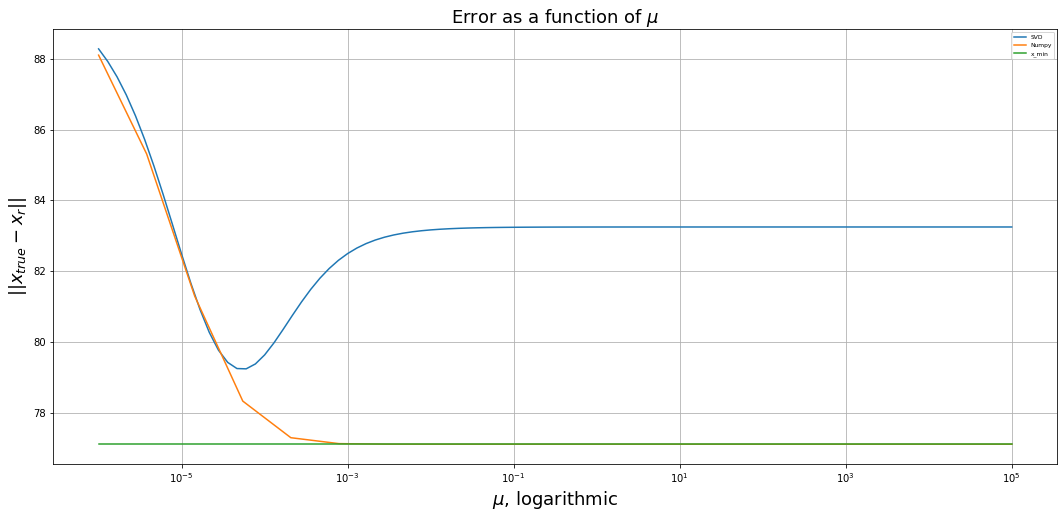

In [151]:
AAt = np.dot(A, A.T)
xmin = numpyMethod(AAt, Y[:,0])
plt.figure(0, figsize = (18,8))
plt.title(r'Error as a function of $\mu$', fontsize = 18)
plt.xlabel(r'$\mu$, logarithmic', fontsize = 18)
plt.ylabel(r'$||x_{true}-x_r||$', fontsize = 18)
plt.grid('true')
plt.plot(mu, error_SVD, label = 'SVD')
plt.plot(mu_np, error_np, label = 'Numpy')
plt.plot(mu, np.repeat(np.linalg.norm(x_true-xmin), num), label = r'x_min')
plt.legend(prop={'size': 6})
plt.xscale('log')

We see that our numpy linalg solve method hugs the SVD method for low values of $\mu$, but when $\mu$ increases, the solve method reaches $x_{min}$, while SVD has a minimum somewhere at $\mu=10^{-4}$ and comes to rest with a larger error for larger $\mu$.

## Task 3
In this task we are interested in the single channel source seperation problem.
$$\vec u +\vec v = \vec y$$
In our case, we are given images that are mixed ones and zeroes ($\vec y$) and we want to seperate them into two vectors, one for zeroes ($\vec u$) and one for ones ($\vec v$).

I will attempt to solve this problem using Tikhonov regularisation. Firstly, let's look at some theory:
### a)

<img src="pictures/Screenshot 2022-09-19 at 14.14.39.png">

Let's first show that $B^{2}=B$.

We know that a matrix $A$ with pairwise orthogonal columns has the property $A^TA=I$   but $AA^{T}≠I$

$$\begin{align*}
B&=I-WW^{T}\\
B^{2}&=(I-WW^{T})(I-WW^{T})\\
&=I^{2}-IWW^{T}-WW^{T}I+WW^{T}WW^{T}\\
&=I-2WW^{T}+WW^{T}\\
B^{2}&=I-WW^{T}=B
\end{align*}$$

We should explore B's eigenvectors before looking at if B is SP(semi-)D. 

Definition of eigenvectors, with eigenvector $\vec v$ and eigenvalue $\lambda$:
$$\begin{align*}
B\vec v&=\lambda\vec v\\
B^{2}\vec v&=\lambda^{2}\vec v\\
B^{2}\vec v&=B\vec v = B^{3}\vec v =\lambda^{3}\vec v
\end{align*}$$
So we have that since B is a projection matrix, then $\lambda=\lambda^{2}=\lambda^{3}=\dots$

Then the only two eigenvalues possible are
$$\lambda=0 \qquad\lor\qquad \lambda=1$$
B is symmetric: $B^{T}=I^{T}-(WW^{T})^{T}=I-WW^{T}=B$

Now we can use the spectral theorem to prove that B is positive semi-definite. 

Spectral theorem: There exists a Q such that
$$B=Q^{T}\Lambda Q$$
Where $\Lambda=diag(\lambda_{1},\dots \lambda_{n})$
Let's insert this into the definition of a positive semi-definite matrix:
$$\vec x^{T}B\vec x\ge0 \qquad\forall\quad \vec x\in\mathbb{R}^{n}$$
$$\begin{align*}
\vec x^{T}Q^{T}\Lambda Q\vec x&=(Q\vec x) ^{T} \Lambda Q\vec x\\
&=\sum\limits_{i=1}^{n}\lambda_{i}(Q\vec x)_{i}^{2} \ge0
\end{align*}$$
Where the last inequality is because  $\lambda_{i}=0 \quad\lor\quad \lambda_{i}=1 \quad \text{for}\quad i=1,\dots n$ 

B is therefore a projection matrix and is symmetric positive semi-definite.  $\square$ 

### c)
#### 1)

<img src = "pictures/Screenshot 2022-09-23 at 13.31.49.png">

As before, let us define $T(\vec x)$ 
$$T(\vec x)=||A\vec x-\vec y||^{2}+\mu||B\vec x||^{2}$$
From this we want to calculate $\nabla_{x}T(\vec x)$. From problem 2a) we know that
$$\nabla_{x}||A\vec x-\vec y||^{2} = 2A^{T}(A\vec x-\vec y)$$
So we only need to calculate $\nabla_{x}\mu||B\vec x||^2$. Again, we introduce the Frobernius inner product $(:)$ 
$$\begin{align*}
\nabla_{x}\mu||B\vec x||^{2}&=\nabla_{x}\mu(B\vec x:B\vec x)\\
&=\nabla_{x}\mu(B^{T}B\vec x:\vec x)\\
&=\mu(2B^{T}B\vec x:d\vec x)\\
&=2\mu B^{T}B\vec x
\end{align*}$$
Inserting the two terms back in $T(\vec x)$:
$$\nabla_{x}T(\vec x) = 2A^{T}(A\vec x-\vec y) + 2\mu B^{T}B\vec x$$
$$(A^{T}A+\mu B^{T} B)\vec x=A^{T}\vec y\qquad\square$$
For our system we have the following:
$$\vec x=\begin{pmatrix}\vec u \\ \vec v\end{pmatrix}$$
$$A = \begin{pmatrix}I & I\end{pmatrix}$$
$$A^{T}A=\begin{pmatrix}I & I \\ I  & I\end{pmatrix}$$
$$B=\begin{pmatrix}B_{0} & 0 \\ 0 & B_1\end{pmatrix}=\begin{pmatrix}I-W_{0}W_{0}^{T} & 0 \\ 0 & I-W_{1}W_{1}^{T}\end{pmatrix}$$
B is symmetric since $B_0,B_1$ are symmetric, and $B_{0}^{2}=B_{0}$ and $B_{1}^2=B_{1}$:
$$\begin{align*}
\mu B^{T}B&=\mu\begin{pmatrix}B_{0}^{2} & 0 \\ 0 & B_{1}^{2}\end{pmatrix}\\
&=\mu\begin{pmatrix}B_{0} & 0\\
0 &B_1\end{pmatrix}\\
&=\begin{pmatrix}\mu(I-W_{0}W_{0}^{T})  & 0\\
0&\mu(I-W_{1}W_{1}^{T})\end{pmatrix}
\end{align*}$$
$$A^{T}\vec y=\begin{pmatrix}I \\ I\end{pmatrix}\vec y=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$

Inserting all this back in the original system:
$$(A^{T}A+\mu B^{T} B)\vec x=A^{T}\vec y$$
$$\left[\begin{pmatrix}I & I \\ I & I\end{pmatrix} + \begin{pmatrix}\mu(I-W_{0}W_{0}^{T})  & 0\\
0&\mu(I-W_{1}W_{1}^{T})\end{pmatrix} \right]\begin{pmatrix}\vec u \\ \vec v \end{pmatrix}=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$
$$\begin{pmatrix}I+\mu(I-W_{0}W_{0}^{T})  & I\\
I&I+\mu(I-W_{1}W_{1}^{T}) \end{pmatrix} \begin{pmatrix}\vec u \\ \vec v \end{pmatrix}=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$



#### 2)

<img src = "pictures/Screenshot 2022-09-26 at 10.25.35.png">

We have from last problem
$$\begin{pmatrix}I+\mu B_{0}  & I\\
I&I+\mu B_{1}\end{pmatrix} \begin{pmatrix}\vec u \\ \vec v \end{pmatrix}=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$
Multiplying out this system
$$
(I+\mu B_{0})\vec u +I\vec v=\vec y \tag{1}
$$
$$
I\vec u+(I+\mu B_{1})\vec v=\vec y \tag{2}
$$
Putting $(1)=(2)$ and multiplying out parenthesis:
$$\begin{align*}
I\vec u+\mu B_{0}\vec u+I\vec v&=I\vec u+I\vec v+\mu B_{1}\vec v\\
B_{0}\vec u&=B_{1}\vec v \tag{3}
\end{align*}$$
Now lets take $B_{1}\cdot (1)$ to get an equation without $\vec v$.
$$B_{1}\vec u+\mu B_{1}B_{0}\vec u+B_{1}\vec v=B_{1}\vec y$$
Inserting $(3)$
$$(B_{1}+\mu B_{1}B_{0}+B_{0})\vec u=B_{1}\vec y$$
Now we have a system we can solve! More generally, we have
$$C_{0}\vec u=\vec d_{0}$$
Where $C_{0}=B_{1}+\mu B_{1}B_{0}+B_{0}$ and $\vec d_{0}=B_{1}\vec y$.

Now we can use this to solve $(3)$.
$$B_{1}\vec v=B_{0}\vec u \quad\Rightarrow\quad C_{1}\vec v=\vec d_0$$
Where $C_{1}= B_{1}$ and $\vec d_{1}=B_{0}\vec u$.

We can now use `np.linalg.solve` to solve this system.

<img src = "pictures/Screenshot 2022-09-26 at 10.47.16.png">

In the following code I have chosen to use numpy's np.linalg.solve to find $\vec u$ and $\vec v$, as numpy has so far been pretty good time-wise.

After defining $C_0, C_1, \vec d_0, \vec d_1$ as described in the last problem, I only need to solve $C_0\vec u= \vec d_0$ and then $C_0\vec v= \vec d_1$.

In [10]:
def calc_u_and_v(W0, W1, mu, y):
    """ 
    Using Tikhonov regulation approach to calculate to solve the system described in 3.c.1 and 3.c.2

    Args:
        W0 (Array(784 x 16)): Matrix containing 16 basis vectors for a linear subspace, representing the number 0
        W1 (Array(784 x 16)): Matrix containing 16 basis vectors for a linear subspace, representing the number 1
        mu (float):           Chosen parameter
        y (array(784 x 100)): Matrix of 100 images, with both a number 0 and number 1, which we will try to separate.
    Returns:
        u (array(784 x 100)): Matrix of 100 images, zero number source seperated out of the corresponding image from y
        v (array(784 x 100)): Matrix of 100 images, one number source seperated out of the corresponding image from y
    """
    B0 = np.eye(784) - W0@W0.transpose()
    B1 = np.eye(784) - W1@W1.transpose()
    C0 = B1 + mu * B1@B0 + B0
    d0 = B1@y
    u = np.linalg.solve(C0, d0)
    C1 = B1
    d1 = B0@u
    v = np.linalg.solve(C1, d1)
    return u, v

Here I'm using an altered function from Project 3 in TMA4320, Intro to Scientific Computing. It is designed to plot out many images in one plot, so that we can look at and compare the solutions.

In [68]:
def plotImgs(images, nplots, imgSize = (8,8)):
    fig, axes = plt.subplots(nplots, nplots)
    oldparams = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = (imgSize)
    
    for idx in range(nplots**2):
        i = idx//nplots 
        j = idx%nplots
        axes[i, j].axis('off')
        axes[i, j].imshow(images[:, idx].reshape((28, 28)), cmap = 'gray')
    plt.tight_layout()
    plt.show()

Let's take a look at the data we are handed out. First the basis vector matrices $W_0$ and $W_1$:

(784, 16)
(784, 16)


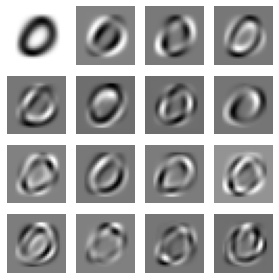

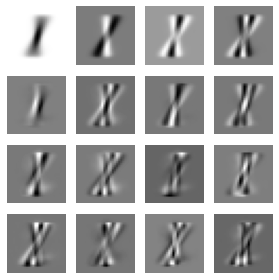

In [67]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)
plotImgs(W0, 4, (4,4))
plotImgs(W1, 4, (4,4))

That looks right. And now our mixed images:

(784, 100)


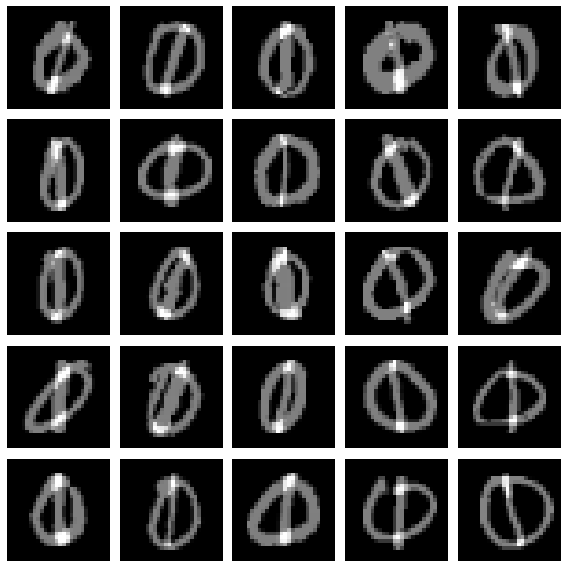

In [107]:
Mixes = np.load('Data/mixed.npy')
print(Mixes.shape) # Should be (784,100)
plotImgs(Mixes, 5)

Okay, everything seems ready for me to try to seperate the mixed images into to our basis vectors. Let's try this with $\mu=1$

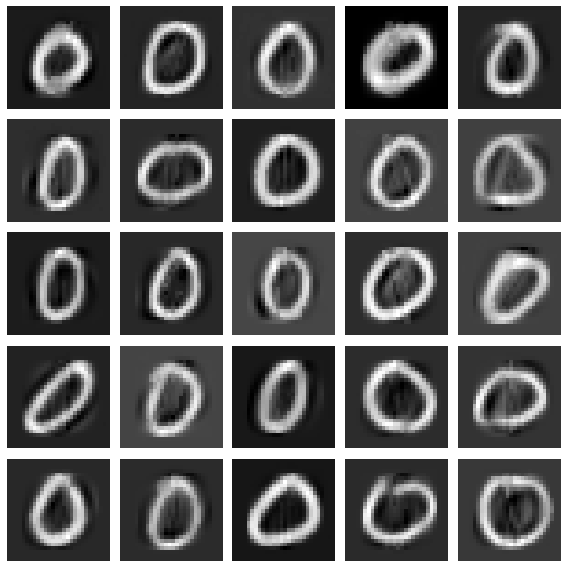

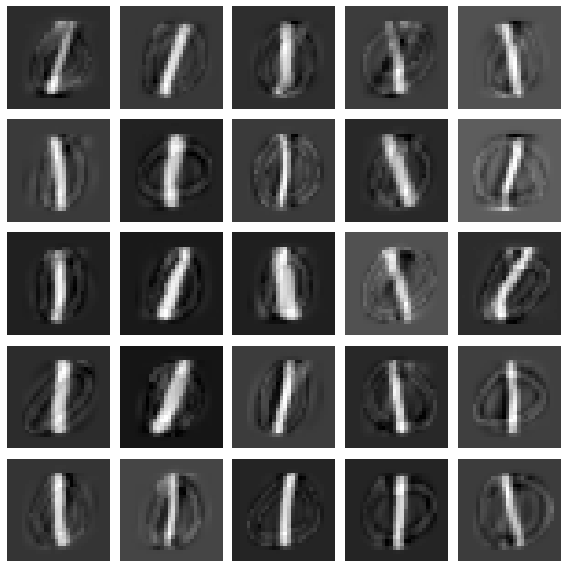

In [108]:
u, v = calc_u_and_v(W0, W1, 1, Mixes)
plotImgs(u, 5)
plotImgs(v, 5)

That worked pretty good! You can still notice the zeroes in the background of the images of the ones though.

We can also look at these side by side:

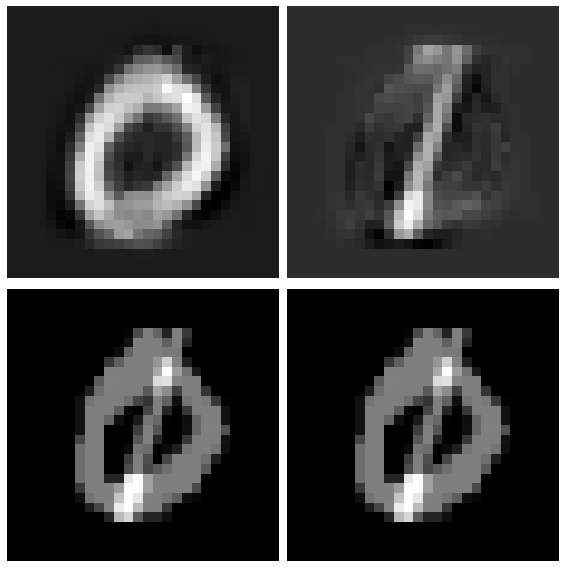

In [87]:
comparisonImages = np.concatenate((u[:,:1], v[:,:1]), axis = 1)                 # First row of images, source seperation 
comparisonImages = np.concatenate((comparisonImages, Mixes[:,:1]), axis = 1)    # Mixes
comparisonImages = np.concatenate((comparisonImages, Mixes[:,:1]), axis = 1)    # Need to add another image so that plotImgs() works
plotImgs(comparisonImages, 2)

Not too bad. We can also experiment with a different $\mu$. I've tested some different values and saw that this one worked pretty well:  $\mu=10^3$.

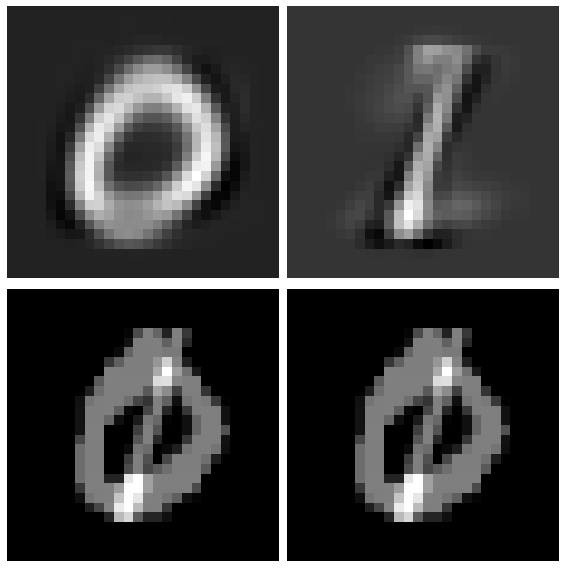

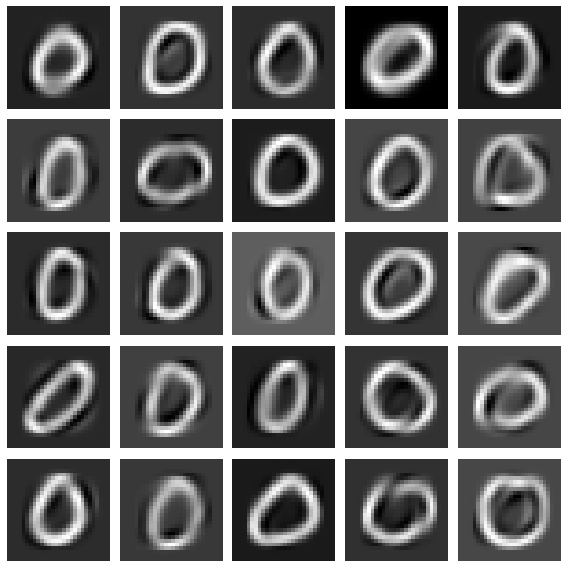

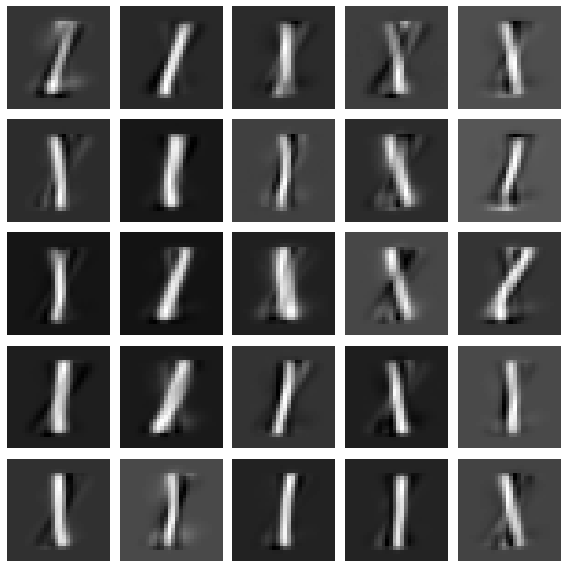

In [138]:
u, v = calc_u_and_v(W0, W1, 10**3, Mixes)
comparisonImages = np.concatenate((u[:,:1], v[:,:1]), axis = 1)                 # First row of images, source seperation 
comparisonImages = np.concatenate((comparisonImages, Mixes[:,:1]), axis = 1)    # Mixes
comparisonImages = np.concatenate((comparisonImages, Mixes[:,:1]), axis = 1)    # Need to add another image so that plotImgs() works
plotImgs(comparisonImages, 2)
plotImgs(u, 5)
plotImgs(v, 5)

In this case, it gave an even better image seperation! I dare not say if this holds generally, but now there seems to be no trace of the zeroes in the images of the ones. Very interesting. 

Lastly, we should investigate the time it uses for the image seperation.

In [96]:
%%timeit -r 5
u, v = calc_u_and_v(W0, W1, 10**3, Mixes)

35.6 ms ± 7.22 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


That's really fast. Plotting took way longer time than actually calculating the single source seperation.

It is clear that this method works well, and that it runs really fast. A disadvantage with this method could be the choice of $\mu$. It could end up being guesswork, and you would just have to test different values. I am not aware of any methodical way to choose a good value for $\mu$.